## Summary of the Geolocation Bias Corrections

+ Distribution of the range delay time series using `boxenplot`
+ Overall RMSE in Table

Link: https://seaborn.pydata.org/generated/seaborn.boxenplot.html

In [1]:
%matplotlib inline
import os
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt, ticker, patches
from mintpy.objects import timeseries, sensor
from mintpy.utils import readfile, utils as ut
from mintpy import add
from ipynb.fs.full import utils
plt.rcParams.update({'font.size': 12})

work_dir = os.path.expanduser('~/Papers/2021_Geolocation/figs_src/box_stats')
os.chdir(work_dir)
print('Go to directory:', work_dir)

proj_dirs = [os.path.expanduser('~/data/geolocation/ChileSenAT149/mintpy_offset'),
             os.path.expanduser('~/data/geolocation/ChileSenDT156/mintpy_offset'),
             os.path.expanduser('~/data/geolocation/KyushuAlos2DT23/mintpy_offset')]

Go to directory: /Users/yunjunz/Papers/2021_Geolocation/figs_src/box_stats


### Table / Figure - Summary of Geolocation Bias Corrections

In [2]:
# prep data for box plot
proj_names = []
df_list = []
for proj_dir in proj_dirs:
    suffix = '' if 'Alos2' in proj_dir else '_S1Bias'
    fnames = [os.path.join(proj_dir, f'timeseriesRg{suffix}.h5'),
              os.path.join(proj_dir, f'timeseriesRg{suffix}_TECjhr.h5'),
              os.path.join(proj_dir, f'timeseriesRg{suffix}_TECjhr_SET.h5'),
              os.path.join(proj_dir, f'timeseriesRg{suffix}_TECjhr_SET_ERA5.h5')]
    proj_name, dDict = utils.read_ts_files(fnames, print_msg=True)[:2]
    proj_names.append(proj_name)
    df_list.append(pd.DataFrame(dDict))

ChileSenAT149: RMSE / MAX
    SAR - S1Bias                            :   18.3 /   61 cm
    SAR - S1Bias - TECjhr                   :    8.5 /   27 cm
    SAR - S1Bias - TECjhr - SET             :    6.2 /   23 cm
    SAR - S1Bias - TECjhr - SET - ERA5      :    6.7 /   24 cm
ChileSenDT156: RMSE / MAX
    SAR - S1Bias                            :    7.1 /   21 cm
    SAR - S1Bias - TECjhr                   :    7.5 /   28 cm
    SAR - S1Bias - TECjhr - SET             :    6.3 /   32 cm
    SAR - S1Bias - TECjhr - SET - ERA5      :    5.8 /   29 cm
KyushuAlos2DT23: RMSE / MAX
    SAR                                     :    266 / 1108 cm
    SAR - TECjhr                            :     94 /  238 cm
    SAR - TECjhr - SET                      :     91 /  230 cm
    SAR - TECjhr - SET - ERA5               :     87 /  208 cm


save figure to file /Users/yunjunz/Papers/2021_Geolocation/figs_src/box_stats/box_stats.pdf


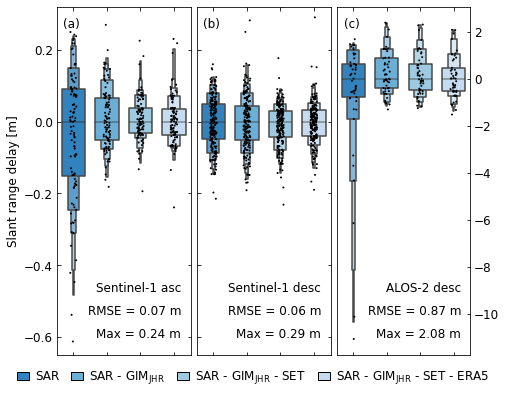

In [3]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=[7, 5])
for ax, df in zip(axs, df_list):
    im = sns.boxenplot(ax=ax, data=df, k_depth='proportion', outlier_prop=0.05, showfliers=False, orient='v', palette="tab20c", width=0.7, saturation=1)
    sns.stripplot(ax=ax, data=df, orient='v', size=2, color='k')

# axis format
for ax in axs:
    ax.set_xticklabels([])
    ax.tick_params(which='both', direction='in', bottom=True, top=True, left=True, right=True)
for ax in axs[:2]: ax.set_ylim(-0.65, 0.32)
axs[0].set_ylabel('Slant range delay [m]')
axs[1].set_yticklabels([])
axs[2].yaxis.tick_right()
axs[2].yaxis.set_label_position("right")
handles = [patches.Rectangle((0, 0), 1, 1, fc=plt.get_cmap('tab20c')(x), ec='k', lw=1) for x in [0, 1, 2, 3]]
labels = [r'SAR',
          r'SAR - GIM$_\mathrm{JHR}$',
          r'SAR - GIM$_\mathrm{JHR}$ - SET',
          r'SAR - GIM$_\mathrm{JHR}$ - SET - ERA5']
fig.tight_layout(pad=0.5)
fig.legend(handles=handles, labels=labels, ncol=4, loc='lower left', bbox_to_anchor=(0.01, -0.1), frameon=False, columnspacing=1, handlelength=1, handletextpad=0.5)

# label
for ax, label in zip(axs, ['(a)', '(b)', '(c)']):
    ax.annotate(label, xy=(0.17, 0.94), xycoords='axes fraction', ha='right')
labels = [
    'Sentinel-1 asc\nRMSE = 0.07 m\nMax = 0.24 m',
    'Sentinel-1 desc\nRMSE = 0.06 m\nMax = 0.29 m',
    'ALOS-2 desc\nRMSE = 0.87 m\nMax = 2.08 m'
]
for ax, label in zip(axs, labels):
    ax.annotate(label, xy=(0.93, 0.05), xycoords='axes fraction', ha='right', linespacing=2.0)

# output
out_fig = os.path.join(work_dir, 'box_stats.pdf')
print('save figure to file', out_fig)
plt.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=300)
plt.show()

### Table - Comparing different TEC products

In [4]:
dDicts = []
for proj_dir in proj_dirs:
    #proj_dir = proj_dirs[0]
    suffix = '' if 'Alos2' in proj_dir else '_S1Bias'
    fnames = [os.path.join(proj_dir, f'timeseriesRg{suffix}_SET_ERA5.h5'),
              os.path.join(proj_dir, f'timeseriesRg{suffix}_SET_ERA5_TECclr.h5'),
              os.path.join(proj_dir, f'timeseriesRg{suffix}_SET_ERA5_TECjlr.h5'),
              os.path.join(proj_dir, f'timeseriesRg{suffix}_SET_ERA5_TECjhr.h5'),
              os.path.join(proj_dir, f'timeseriesRg{suffix}_SET_ERA5_TECsub.h5')]
    proj_name, dDict = utils.read_ts_files(fnames, print_max=False)[:2]
    dDicts.append(dDict)

# Expected ALOS-2 geolocation using sub-orbital TEC
s1_jhr = ut.root_mean_sq_error(dDicts[0]['SAR - S1Bias - SET - ERA5 - TECjhr']) * 100.
s1_sub = ut.root_mean_sq_error(dDicts[0]['SAR - S1Bias - SET - ERA5 - TECsub']) * 100.
a2_jhr = ut.root_mean_sq_error(dDicts[2]['SAR - SET - ERA5 - TECjhr']) * 100.
a2_sub = np.sqrt(a2_jhr**2 - (np.sqrt(s1_jhr**2 - s1_sub**2) * 18)**2)
print('Expected ALOS-2 RMSE with sub-orbital TEC   : {:6.0f} cm'.format(a2_sub))

ChileSenAT149: RMSE
    SAR - S1Bias - SET - ERA5               :   18.1 cm
    SAR - S1Bias - SET - ERA5 - TECclr      :   22.3 cm
    SAR - S1Bias - SET - ERA5 - TECjlr      :   20.0 cm
    SAR - S1Bias - SET - ERA5 - TECjhr      :    6.7 cm
    SAR - S1Bias - SET - ERA5 - TECsub      :    5.3 cm


/Users/yunjunz/tools/miniconda3/envs/insar/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


ChileSenDT156: RMSE
    SAR - S1Bias - SET - ERA5               :    5.7 cm
    SAR - S1Bias - SET - ERA5 - TECclr      :    5.2 cm
    SAR - S1Bias - SET - ERA5 - TECjlr      :    5.2 cm
    SAR - S1Bias - SET - ERA5 - TECjhr      :    5.8 cm
KyushuAlos2DT23: RMSE
    SAR - SET - ERA5                        :    271 cm
    SAR - SET - ERA5 - TECclr               :    127 cm
    SAR - SET - ERA5 - TECjlr               :    115 cm
    SAR - SET - ERA5 - TECjhr               :     87 cm
Expected ALOS-2 RMSE with sub-orbital TEC   :     45 cm


### Implication for Stack Coregistration

In [5]:
s1_ts = []
a2_ts = []
for proj_dir in proj_dirs:
    suffix = '' if 'Alos2' in proj_dir else '_S1Bias'
    fnames = [os.path.join(proj_dir, f'timeseriesRg{suffix}_TECjhr_SET_ERA5.h5')]
    proj_name, dDict = utils.read_ts_files(fnames, print_max=False)[:2]
    # save info
    if 'Sen' in proj_name:
        s1_ts += dDict['SAR - S1Bias - TECjhr - SET - ERA5'].tolist()
    else:
        a2_ts += dDict['SAR - TECjhr - SET - ERA5'].tolist()

ChileSenAT149: RMSE
    SAR - S1Bias - TECjhr - SET - ERA5      :    6.7 cm
ChileSenDT156: RMSE
    SAR - S1Bias - TECjhr - SET - ERA5      :    5.8 cm
KyushuAlos2DT23: RMSE
    SAR - TECjhr - SET - ERA5               :     87 cm


In [6]:
# Conclusion for stack coregistration - S1
s1_num = len(s1_ts)
s1_rg_std = ut.root_mean_sq_error(s1_ts)  # Yunjun et al. [in prep]
s1_az_std = 0.36                          # Gisinger et al. (2021)
s1_rg_std_pix = s1_rg_std * 2 / sensor.SENSOR_DICT['sen']['range_pixel_size']
s1_az_std_pix = s1_az_std * 2 / sensor.SENSOR_DICT['sen']['azimuth_pixel_size']
print(f'S1 ({s1_num} images) - rg: {s1_rg_std:.2f} m (1-sigma) / {s1_rg_std_pix:.2f} pixel (2-sigma)')
print(f'S1 ({s1_num} images) - az: {s1_az_std:.2f} m (1-sigma) / {s1_az_std_pix:.2f} pixel (2-sigma)')

S1 (304 images) - rg: 0.06 m (1-sigma) / 0.05 pixel (2-sigma)
S1 (304 images) - az: 0.36 m (1-sigma) / 0.05 pixel (2-sigma)


In [7]:
# Conclusion for stack coregistration - ALOS-2
a2_num = len(a2_ts)
a2_rg_std = ut.root_mean_sq_error(a2_ts)  # Yunjun et al. [in prep]
a2_rg_std_pix_sm = a2_rg_std / sensor.SENSOR_DICT['alos2']['range_pixel_size']['stripmap_ultrafine']
a2_rg_std_pix_sc = a2_rg_std / sensor.SENSOR_DICT['alos2']['range_pixel_size']['scansar_normal']
print(f'ALOS-2 ({a2_num} images) - rg: {a2_rg_std:.2f} m (1-sigma) / {a2_rg_std_pix_sm:.2f} pixel (1-sigma; SM) / {a2_rg_std_pix_sc:.2f} pixel (1-sigma; SC)')

ALOS-2 (49 images) - rg: 0.87 m (1-sigma) / 0.61 pixel (1-sigma; SM) / 0.10 pixel (1-sigma; SC)
